In [ ]:
import pandas as pd
import numpy as np
import string
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('test.csv')

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
df.dropna

<bound method DataFrame.dropna of        uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son 

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df=df.dropna(subset=['condition'])
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df=df.filter(items=['drugName'])
df

,drugName
0,Mirtazapine
1,Mesalamine
2,Bactrim
3,Contrave
4,Cyclafem 1 / 35
...,...
53761,Tamoxifen
53762,Escitalopram
53763,Levonorgestrel
53764,Tapentadol


In [ ]:
df.drop_duplicates()

,drugName
0,Mirtazapine
1,Mesalamine
2,Bactrim
3,Contrave
4,Cyclafem 1 / 35
...,...
53546,Empagliflozin / metformin
53628,Allergy DN PE
53637,Guarana
53724,Maprotiline


In [ ]:
df.isnull().sum()

drugName    0
dtype: int64

In [ ]:
df2 = pd.read_csv("test2.csv")
df2

,BrandName,ChemicalName,Manufacturer,Category
0,MISOPROST-25,MISOPROSTOL-25,CIPLA LTD,TABLET
1,A&D,carbohydrates+saturated fatty acids+mono satur...,EASTERN HEALTHCARE,CAPSULE
2,AB-FLO,ACEBROPHYLLINE,PURE & CURE HEALTHCARE PVT LTD,CAPSULE
3,PANTOCID L,PANTOPRAZOLE SODIUM+LEVOSULPRIDE,SUN PHARMA LABORATORIES LTD,CAPSULE
4,URSOCOL SR 450,URSODEOXYCHOLIC ACID IP,SUN PHARMA LABORATORIES LTD,TABLET
...,...,...,...,...
1709,ATTENTROL 10 MG CAPS,ATOMOXETINE 10,SUN PHARMA LABORATORIES LTD,CAPSULE
1710,SIZODON 2 MG TAB,RISPERIDONE 2 MG,SUN PHARMA LABORATORIES LTD,TABLET
1711,SIZOPIN 25 MG TAB,CLOZAPINE 25,SUN PHARMA LABORATORIES LTD,TABLET
1712,SIZOPIN 100 MG TAB,CLOZAPINE 100,SUN PHARMA LABORATORIES LTD,TABLET


In [ ]:
df2.isnull().sum()

BrandName        0
ChemicalName    18
Manufacturer    13
Category         0
dtype: int64

In [ ]:
df2.rename(columns = {'BrandName':'drugName'}, inplace = True)
df2

,drugName,ChemicalName,Manufacturer,Category
0,MISOPROST-25,MISOPROSTOL-25,CIPLA LTD,TABLET
1,A&D,carbohydrates+saturated fatty acids+mono satur...,EASTERN HEALTHCARE,CAPSULE
2,AB-FLO,ACEBROPHYLLINE,PURE & CURE HEALTHCARE PVT LTD,CAPSULE
3,PANTOCID L,PANTOPRAZOLE SODIUM+LEVOSULPRIDE,SUN PHARMA LABORATORIES LTD,CAPSULE
4,URSOCOL SR 450,URSODEOXYCHOLIC ACID IP,SUN PHARMA LABORATORIES LTD,TABLET
...,...,...,...,...
1709,ATTENTROL 10 MG CAPS,ATOMOXETINE 10,SUN PHARMA LABORATORIES LTD,CAPSULE
1710,SIZODON 2 MG TAB,RISPERIDONE 2 MG,SUN PHARMA LABORATORIES LTD,TABLET
1711,SIZOPIN 25 MG TAB,CLOZAPINE 25,SUN PHARMA LABORATORIES LTD,TABLET
1712,SIZOPIN 100 MG TAB,CLOZAPINE 100,SUN PHARMA LABORATORIES LTD,TABLET


In [ ]:
df2=df2.filter(items=['drugName'])
df2

,drugName
0,MISOPROST-25
1,A&D
2,AB-FLO
3,PANTOCID L
4,URSOCOL SR 450
...,...
1709,ATTENTROL 10 MG CAPS
1710,SIZODON 2 MG TAB
1711,SIZOPIN 25 MG TAB
1712,SIZOPIN 100 MG TAB


In [ ]:
df2.isnull().sum()

drugName    0
dtype: int64

In [ ]:
merged = pd.merge(df,df2,on='drugName',how = 'outer')
merged

,drugName
0,Mirtazapine
1,Mirtazapine
2,Mirtazapine
3,Mirtazapine
4,Mirtazapine
...,...
55180,ATTENTROL 10 MG CAPS
55181,SIZODON 2 MG TAB
55182,SIZOPIN 25 MG TAB
55183,SIZOPIN 100 MG TAB


In [ ]:
merged=merged.drop_duplicates()
merged

,drugName
0,Mirtazapine
178,Mesalamine
235,Bactrim
296,Contrave
591,Cyclafem 1 / 35
...,...
55180,ATTENTROL 10 MG CAPS
55181,SIZODON 2 MG TAB
55182,SIZOPIN 25 MG TAB
55183,SIZOPIN 100 MG TAB


In [ ]:
vals = merged.values
vals

array([['Mirtazapine'],
       ['Mesalamine'],
       ['Bactrim'],
       ...,
       ['SIZOPIN 25 MG TAB'],
       ['SIZOPIN 100 MG TAB'],
       ['LITHOSUN 300 MG TAB']], dtype=object)

In [ ]:
type(vals)

numpy.ndarray

In [ ]:
newlist = vals.tolist()
newlist

[['Mirtazapine'],
 ['Mesalamine'],
 ['Bactrim'],
 ['Contrave'],
 ['Cyclafem 1 / 35'],
 ['Zyclara'],
 ['Copper'],
 ['Amitriptyline'],
 ['Methadone'],
 ['Levora'],
 ['Paroxetine'],
 ['Miconazole'],
 ['Belviq'],
 ['Seroquel'],
 ['Ambien'],
 ['Nuvigil'],
 ['Chantix'],
 ['Microgestin Fe 1 / 20'],
 ['Klonopin'],
 ['Ciprofloxacin'],
 ['Trazodone'],
 ['EnteraGam'],
 ['Aripiprazole'],
 ['Cyclosporine'],
 ['Oxybutynin'],
 ['Lurasidone'],
 ['Clonazepam'],
 ['Ciclopirox'],
 ['Sodium oxybate'],
 ['Lamotrigine'],
 ['Blisovi Fe 1 / 20'],
 ['Ivermectin'],
 ['Suprep Bowel Prep Kit'],
 ['Movantik'],
 ['Actos'],
 ['Duloxetine'],
 ['NuvaRing'],
 ['Escitalopram'],
 ['Tesamorelin'],
 ['Campral'],
 ['Gabapentin'],
 ['Levonorgestrel'],
 ['Aubra'],
 ['Plan B One-Step'],
 ['Ethinyl estradiol / etonogestrel'],
 ['Microgestin Fe 1.5 / 30'],
 ['Wellbutrin'],
 ['Benzoyl peroxide / clindamycin'],
 ['Etonogestrel'],
 ['Nitrofurantoin'],
 ['Ortho Tri-Cyclen Lo'],
 ['Tamsulosin'],
 ['Tofacitinib'],
 ['Cryselle'],
 ['Am

In [ ]:
type(newlist)

list

In [ ]:
listToStr = ' '.join(map(str, newlist))
listToStr

'[\'Mirtazapine\'] [\'Mesalamine\'] [\'Bactrim\'] [\'Contrave\'] [\'Cyclafem 1 / 35\'] [\'Zyclara\'] [\'Copper\'] [\'Amitriptyline\'] [\'Methadone\'] [\'Levora\'] [\'Paroxetine\'] [\'Miconazole\'] [\'Belviq\'] [\'Seroquel\'] [\'Ambien\'] [\'Nuvigil\'] [\'Chantix\'] [\'Microgestin Fe 1 / 20\'] [\'Klonopin\'] [\'Ciprofloxacin\'] [\'Trazodone\'] [\'EnteraGam\'] [\'Aripiprazole\'] [\'Cyclosporine\'] [\'Oxybutynin\'] [\'Lurasidone\'] [\'Clonazepam\'] [\'Ciclopirox\'] [\'Sodium oxybate\'] [\'Lamotrigine\'] [\'Blisovi Fe 1 / 20\'] [\'Ivermectin\'] [\'Suprep Bowel Prep Kit\'] [\'Movantik\'] [\'Actos\'] [\'Duloxetine\'] [\'NuvaRing\'] [\'Escitalopram\'] [\'Tesamorelin\'] [\'Campral\'] [\'Gabapentin\'] [\'Levonorgestrel\'] [\'Aubra\'] [\'Plan B One-Step\'] [\'Ethinyl estradiol / etonogestrel\'] [\'Microgestin Fe 1.5 / 30\'] [\'Wellbutrin\'] [\'Benzoyl peroxide / clindamycin\'] [\'Etonogestrel\'] [\'Nitrofurantoin\'] [\'Ortho Tri-Cyclen Lo\'] [\'Tamsulosin\'] [\'Tofacitinib\'] [\'Cryselle\'] [\'A

In [ ]:
type(listToStr)

str

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
clean_text1 = []
def to_lower(data) :
 for words in listToStr :
   clean_text1.append(str.lower(words))

In [ ]:
to_lower(listToStr)
clean_text1

['[',
 "'",
 'm',
 'i',
 'r',
 't',
 'a',
 'z',
 'a',
 'p',
 'i',
 'n',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'm',
 'e',
 's',
 'a',
 'l',
 'a',
 'm',
 'i',
 'n',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'b',
 'a',
 'c',
 't',
 'r',
 'i',
 'm',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'c',
 'o',
 'n',
 't',
 'r',
 'a',
 'v',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'c',
 'y',
 'c',
 'l',
 'a',
 'f',
 'e',
 'm',
 ' ',
 '1',
 ' ',
 '/',
 ' ',
 '3',
 '5',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'z',
 'y',
 'c',
 'l',
 'a',
 'r',
 'a',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'c',
 'o',
 'p',
 'p',
 'e',
 'r',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'a',
 'm',
 'i',
 't',
 'r',
 'i',
 'p',
 't',
 'y',
 'l',
 'i',
 'n',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'm',
 'e',
 't',
 'h',
 'a',
 'd',
 'o',
 'n',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'l',
 'e',
 'v',
 'o',
 'r',
 'a',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'p',
 'a',
 'r',
 'o',
 'x',
 'e',
 't',
 'i',
 'n',
 'e',
 "'",
 ']',
 ' ',
 '[',
 "'",
 'm',
 'i',
 'c',
 'o',
 'n',
 'a',
 'z',
 'o'

In [ ]:
clean_text2 = [word_tokenize(i) for i in clean_text1]

In [ ]:
clean_text2

[['['],
 ["'"],
 ['m'],
 ['i'],
 ['r'],
 ['t'],
 ['a'],
 ['z'],
 ['a'],
 ['p'],
 ['i'],
 ['n'],
 ['e'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['m'],
 ['e'],
 ['s'],
 ['a'],
 ['l'],
 ['a'],
 ['m'],
 ['i'],
 ['n'],
 ['e'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['b'],
 ['a'],
 ['c'],
 ['t'],
 ['r'],
 ['i'],
 ['m'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['c'],
 ['o'],
 ['n'],
 ['t'],
 ['r'],
 ['a'],
 ['v'],
 ['e'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['c'],
 ['y'],
 ['c'],
 ['l'],
 ['a'],
 ['f'],
 ['e'],
 ['m'],
 [],
 ['1'],
 [],
 ['/'],
 [],
 ['3'],
 ['5'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['z'],
 ['y'],
 ['c'],
 ['l'],
 ['a'],
 ['r'],
 ['a'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['c'],
 ['o'],
 ['p'],
 ['p'],
 ['e'],
 ['r'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['a'],
 ['m'],
 ['i'],
 ['t'],
 ['r'],
 ['i'],
 ['p'],
 ['t'],
 ['y'],
 ['l'],
 ['i'],
 ['n'],
 ['e'],
 ["'"],
 [']'],
 [],
 ['['],
 ["'"],
 ['m'],
 ['e'],
 ['t'],
 ['h'],
 ['a'],
 ['d'],
 ['o'],
 ['n'],
 ['e'],
 ["'"],
 

In [ ]:
import re
clean_text3 = []
for words in clean_text2:
  clean = []
  for w in words : 
    res =re.sub(r'[^\w\s]' ,"", w)
    if res!= "":
      clean.append(res)
    clean_text3.append(clean)

In [ ]:
clean_text3

[[],
 [],
 ['m'],
 ['i'],
 ['r'],
 ['t'],
 ['a'],
 ['z'],
 ['a'],
 ['p'],
 ['i'],
 ['n'],
 ['e'],
 [],
 [],
 [],
 [],
 ['m'],
 ['e'],
 ['s'],
 ['a'],
 ['l'],
 ['a'],
 ['m'],
 ['i'],
 ['n'],
 ['e'],
 [],
 [],
 [],
 [],
 ['b'],
 ['a'],
 ['c'],
 ['t'],
 ['r'],
 ['i'],
 ['m'],
 [],
 [],
 [],
 [],
 ['c'],
 ['o'],
 ['n'],
 ['t'],
 ['r'],
 ['a'],
 ['v'],
 ['e'],
 [],
 [],
 [],
 [],
 ['c'],
 ['y'],
 ['c'],
 ['l'],
 ['a'],
 ['f'],
 ['e'],
 ['m'],
 ['1'],
 [],
 ['3'],
 ['5'],
 [],
 [],
 [],
 [],
 ['z'],
 ['y'],
 ['c'],
 ['l'],
 ['a'],
 ['r'],
 ['a'],
 [],
 [],
 [],
 [],
 ['c'],
 ['o'],
 ['p'],
 ['p'],
 ['e'],
 ['r'],
 [],
 [],
 [],
 [],
 ['a'],
 ['m'],
 ['i'],
 ['t'],
 ['r'],
 ['i'],
 ['p'],
 ['t'],
 ['y'],
 ['l'],
 ['i'],
 ['n'],
 ['e'],
 [],
 [],
 [],
 [],
 ['m'],
 ['e'],
 ['t'],
 ['h'],
 ['a'],
 ['d'],
 ['o'],
 ['n'],
 ['e'],
 [],
 [],
 [],
 [],
 ['l'],
 ['e'],
 ['v'],
 ['o'],
 ['r'],
 ['a'],
 [],
 [],
 [],
 [],
 ['p'],
 ['a'],
 ['r'],
 ['o'],
 ['x'],
 ['e'],
 ['t'],
 ['i'],
 ['n'],
 ['e'],
 

In [ ]:
len(clean_text3)

68376

In [ ]:
type(clean_text3)

list

In [ ]:
s = ' '.join(map(str, clean_text3))
s

"[] [] ['m'] ['i'] ['r'] ['t'] ['a'] ['z'] ['a'] ['p'] ['i'] ['n'] ['e'] [] [] [] [] ['m'] ['e'] ['s'] ['a'] ['l'] ['a'] ['m'] ['i'] ['n'] ['e'] [] [] [] [] ['b'] ['a'] ['c'] ['t'] ['r'] ['i'] ['m'] [] [] [] [] ['c'] ['o'] ['n'] ['t'] ['r'] ['a'] ['v'] ['e'] [] [] [] [] ['c'] ['y'] ['c'] ['l'] ['a'] ['f'] ['e'] ['m'] ['1'] [] ['3'] ['5'] [] [] [] [] ['z'] ['y'] ['c'] ['l'] ['a'] ['r'] ['a'] [] [] [] [] ['c'] ['o'] ['p'] ['p'] ['e'] ['r'] [] [] [] [] ['a'] ['m'] ['i'] ['t'] ['r'] ['i'] ['p'] ['t'] ['y'] ['l'] ['i'] ['n'] ['e'] [] [] [] [] ['m'] ['e'] ['t'] ['h'] ['a'] ['d'] ['o'] ['n'] ['e'] [] [] [] [] ['l'] ['e'] ['v'] ['o'] ['r'] ['a'] [] [] [] [] ['p'] ['a'] ['r'] ['o'] ['x'] ['e'] ['t'] ['i'] ['n'] ['e'] [] [] [] [] ['m'] ['i'] ['c'] ['o'] ['n'] ['a'] ['z'] ['o'] ['l'] ['e'] [] [] [] [] ['b'] ['e'] ['l'] ['v'] ['i'] ['q'] [] [] [] [] ['s'] ['e'] ['r'] ['o'] ['q'] ['u'] ['e'] ['l'] [] [] [] [] ['a'] ['m'] ['b'] ['i'] ['e'] ['n'] [] [] [] [] ['n'] ['u'] ['v'] ['i'] ['g'] ['i'] ['l'] 

In [ ]:
type(s)

str

In [ ]:
for ch in ['[',']']:
        if ch in s:
            s = s.replace(ch,'')
        

In [ ]:
s

"  'm' 'i' 'r' 't' 'a' 'z' 'a' 'p' 'i' 'n' 'e'     'm' 'e' 's' 'a' 'l' 'a' 'm' 'i' 'n' 'e'     'b' 'a' 'c' 't' 'r' 'i' 'm'     'c' 'o' 'n' 't' 'r' 'a' 'v' 'e'     'c' 'y' 'c' 'l' 'a' 'f' 'e' 'm' '1'  '3' '5'     'z' 'y' 'c' 'l' 'a' 'r' 'a'     'c' 'o' 'p' 'p' 'e' 'r'     'a' 'm' 'i' 't' 'r' 'i' 'p' 't' 'y' 'l' 'i' 'n' 'e'     'm' 'e' 't' 'h' 'a' 'd' 'o' 'n' 'e'     'l' 'e' 'v' 'o' 'r' 'a'     'p' 'a' 'r' 'o' 'x' 'e' 't' 'i' 'n' 'e'     'm' 'i' 'c' 'o' 'n' 'a' 'z' 'o' 'l' 'e'     'b' 'e' 'l' 'v' 'i' 'q'     's' 'e' 'r' 'o' 'q' 'u' 'e' 'l'     'a' 'm' 'b' 'i' 'e' 'n'     'n' 'u' 'v' 'i' 'g' 'i' 'l'     'c' 'h' 'a' 'n' 't' 'i' 'x'     'm' 'i' 'c' 'r' 'o' 'g' 'e' 's' 't' 'i' 'n' 'f' 'e' '1'  '2' '0'     'k' 'l' 'o' 'n' 'o' 'p' 'i' 'n'     'c' 'i' 'p' 'r' 'o' 'f' 'l' 'o' 'x' 'a' 'c' 'i' 'n'     't' 'r' 'a' 'z' 'o' 'd' 'o' 'n' 'e'     'e' 'n' 't' 'e' 'r' 'a' 'g' 'a' 'm'     'a' 'r' 'i' 'p' 'i' 'p' 'r' 'a' 'z' 'o' 'l' 'e'     'c' 'y' 'c' 'l' 'o' 's' 'p' 'o' 'r' 'i' 'n' 'e'     'o' 'x' 'y' 'b'

In [ ]:
len(s)


217742

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
tokenizer = pickle.load(open('tokenise.pkl', 'rb'))

In [ ]:
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts([s])

#saving the tokenizer for predict function
#pickle.dump(tokenizer, open('tokenise.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([s])[0]
sequence_data[:15]

[11, 2, 6, 8, 3, 23, 3, 12, 2, 5, 1, 11, 1, 9, 3]

In [ ]:
te = tokenizer.texts_to_sequences(["'a','b'"])
print(te)

[[3, 18]]


In [ ]:
len(sequence_data)

49789

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

37


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:1]

The Length of sequences are:  49786


array([[11,  2,  6,  8]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:5])
print("\nResponse: ", y[:5])

Data:  [[11  2  6]
 [ 2  6  8]
 [ 6  8  3]
 [ 8  3 23]
 [ 3 23  3]]

Response:  [ 8  3 23  3 12]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             370       
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 3, 1000)           8004000   
                                                                 
 lstm_2 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 37)                37037     
                                                                 
Total params: 21,090,407
Trainable params: 21,090,407
No

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def results(model,history, x_test, y_test):
  
  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  test_loss, test_acc = model.evaluate( x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

In [ ]:
history = model.fit(X,y, epochs=30, batch_size=256, callbacks=[checkpoint],validation_data = (X_test, y_test))

Epoch 1/30
195/195 [==============================] - ETA: 0s - loss: 2.8043 - accuracy: 0.1646
Epoch 1: loss improved from inf to 2.80427, saving model to next_words.h5
195/195 [==============================] - 361s 2s/step - loss: 2.8043 - accuracy: 0.1646 - val_loss: 2.7397 - val_accuracy: 0.1747
Epoch 2/30
195/195 [==============================] - ETA: 0s - loss: 2.7273 - accuracy: 0.1796
Epoch 2: loss improved from 2.80427 to 2.72726, saving model to next_words.h5
195/195 [==============================] - 358s 2s/step - loss: 2.7273 - accuracy: 0.1796 - val_loss: 2.6703 - val_accuracy: 0.1890
Epoch 3/30
195/195 [==============================] - ETA: 0s - loss: 2.6658 - accuracy: 0.1972
Epoch 3: loss improved from 2.72726 to 2.66581, saving model to next_words.h5
195/195 [==============================] - 362s 2s/step - loss: 2.6658 - accuracy: 0.1972 - val_loss: 2.6280 - val_accuracy: 0.1992
Epoch 4/30
195/195 [==============================] - ETA: 0s - loss: 2.6175 - accurac

In [ ]:
import itertools
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(vocab_size)
    plt.xticks(tick_marks, tokenizer.word_index, rotation=45)
    plt.yticks(tick_marks, tokenizer.word_index)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
#tokenizer = pickle.load(open('tokenise.pkl', 'rb'))
model = load_model('next_words.h5')

1556/1556 [==============================] - 167s 106ms/step - loss: 1.6016 - accuracy: 0.4549
Test accuracy: 0.45490700006484985
Test loss: 1.6016347408294678


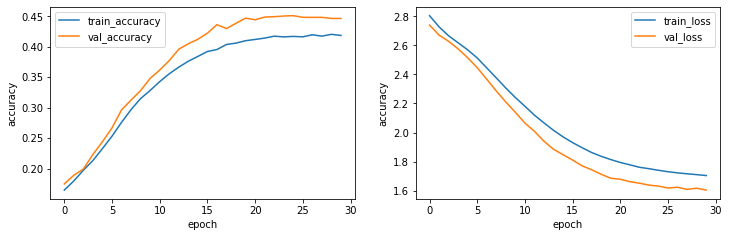

In [ ]:
results(model,history, X, y)

In [ ]:
y_pred = model.predict(X_test)

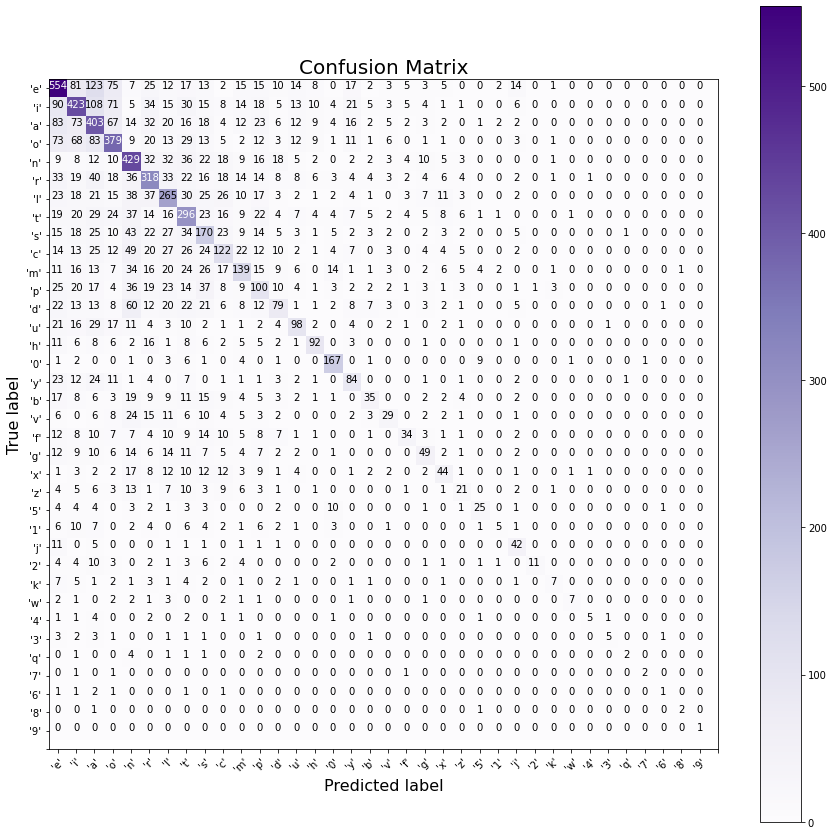

In [ ]:
plot_confusion_matrix(y_test,y_pred) 

In [ ]:
def Predict_Next_Words(model,tokenizer, text1):  
  seq = tokenizer.texts_to_sequences([text1])
  seq = np.array(seq)
  preds = np.argmax(model.predict(seq))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  return predicted_word[1]

In [ ]:
text1= []
str = ""
restr = ""
te=""
text = input("Enter your letters: ")
while(True):
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
    if (len(text)==3):
      temp='"'+"'"+text[0]+"',"+"'"+text[1]+"',"+"'"+text[2]+"'"+'"'
      str= Predict_Next_Words(model,tokenizer,temp)
      restr = restr+str      
      if(len(restr)==8):
        print("Required String : ", restr)
        break
      te = text[1]+text[2]+str
      text=te
    else:
      print("Error in input")
      break

Enter your letters: sky
Required String :  ceraceta
